In [8]:
import tensorflow as tf
import numpy as np

In [9]:
tf.set_random_seed(777)

In [10]:
xy = np.loadtxt('data-03-diabetes.csv', delimiter = ',', dtype=float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [11]:
print(x_data.shape, y_data.shape)

(759, 8) (759, 1)


In [12]:
X = tf.placeholder(tf.float32, shape = [None, 8])
Y = tf.placeholder(tf.float32, shape = [None, 1])

In [13]:
W = tf.Variable(tf.random_normal([8, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

In [14]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [15]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

In [16]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [17]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = float32))

In [19]:
Cost_val = []
Steps = []

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, val = sess.run([cost, train], feed_dict = {X : x_data, Y : y_data})
        Cost_val.append(cost_val)
        Steps.append(step)
        if step % 200 == 0:
            print(step, cost_val)
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X : x_data, Y : y_data})
    print("\nHypothesis : ", h, "\nCorrect (Y) : ", c, "\nAccuracy : ", a)

0 0.7732459
200 0.71161324
400 0.68728334
600 0.6696454
800 0.65426886
1000 0.64036196
1200 0.6277004
1400 0.6161576
1600 0.60562956
1800 0.5960222
2000 0.58724964
2200 0.57923305
2400 0.57190084
2600 0.5651879
2800 0.5590355
3000 0.55339015
3200 0.54820395
3400 0.5434337
3600 0.53904057
3800 0.5349896
4000 0.53124934
4200 0.5277915
4400 0.5245909
4600 0.5216247
4800 0.5188723
5000 0.51631534
5200 0.5139372
5400 0.5117227
5600 0.50965846
5800 0.5077321
6000 0.50593245
6200 0.5042497
6400 0.50267446
6600 0.5011984
6800 0.49981412
7000 0.49851465
7200 0.4972937
7400 0.49614555
7600 0.49506482
7800 0.4940469
8000 0.49308723
8200 0.49218184
8400 0.491327
8600 0.49051917
8800 0.48975533
9000 0.48903254
9200 0.48834807
9400 0.48769954
9600 0.48708454
9800 0.48650107
10000 0.48594704

Hypothesis :  [[0.44254455]
 [0.9279897 ]
 [0.2471421 ]
 [0.93972206]
 [0.18146107]
 [0.7377554 ]
 [0.9331372 ]
 [0.57778245]
 [0.31366262]
 [0.47901955]
 [0.6617495 ]
 [0.17945838]
 [0.22911033]
 [0.44160292]
 

In [23]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

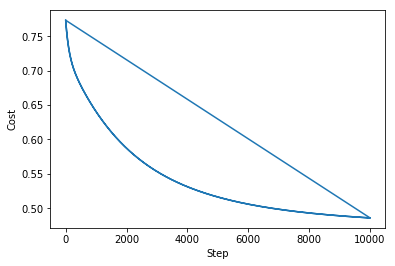

In [25]:
plt.plot(Steps, Cost_val)
plt.xlabel('Step')
plt.ylabel('Cost')
plt.show